# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [50]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [51]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?'


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'



    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
    # Run the API request for each of the cities
        response = requests.get(city_url)
        if response.status_code == 200:  # Check if the request was successful
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather['coord']['lat']
            city_lng = city_weather['coord']['lon']
            city_max_temp = city_weather['main']['temp_max']
            city_humidity = city_weather['main']['humidity']
            city_clouds = city_weather['clouds']['all']
            city_wind = city_weather['wind']['speed']
            city_country = city_weather['sys']['country']

            # Extract the UNIX timestamp (date) from the API response
            timestamp = city_weather['dt']

            # Convert the UNIX timestamp to a readable date format using time module
            city_date = time.strftime('%Y-%m-%d %H:%M:%S', time.gmtime(timestamp))

            # Append the City information into city_data list
            city_data.append({
                "City": city,
                "Lat": city_lat,
                "Lng": city_lng,
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date
            })

        else:
            print(f"Error fetching data for {city}. Status code: {response.status_code}")

    except requests.exceptions.RequestException as e:
        print(f"Error requesting data for {city}: {e}")


    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fuvahmulah
Error fetching data for fuvahmulah. Status code: 404
Processing Record 2 of Set 1 | wailua homesteads
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | bodaybo
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | wickenburg
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | kos
Processing Record 11 of Set 1 | centar zupa
Processing Record 12 of Set 1 | howrah
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | mega
Processing Record 15 of Set 1 | happy valley-goose bay
Processing Record 16 of Set 1 | tura
Processing Record 17 of Set 1 | papatowai
Processing Record 18 of Set 1 | nuuk
Processing Record 19 of Set 1 | tsetserleg
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | bar-sur-aube
Pr

In [52]:
print(city_data)

[{'City': 'wailua homesteads', 'Lat': 22.0669, 'Lng': -159.378, 'Max Temp': 22.44, 'Humidity': 86, 'Cloudiness': 100, 'Wind Speed': 6.17, 'Country': 'US', 'Date': '2025-03-20 12:13:15'}, {'City': 'bethel', 'Lat': 41.3712, 'Lng': -73.414, 'Max Temp': 5.18, 'Humidity': 92, 'Cloudiness': 99, 'Wind Speed': 0.89, 'Country': 'US', 'Date': '2025-03-20 12:13:16'}, {'City': 'bodaybo', 'Lat': 57.8506, 'Lng': 114.1933, 'Max Temp': -11.28, 'Humidity': 93, 'Cloudiness': 100, 'Wind Speed': 0.5, 'Country': 'RU', 'Date': '2025-03-20 12:13:17'}, {'City': 'waitangi', 'Lat': -43.9535, 'Lng': -176.5597, 'Max Temp': 13.79, 'Humidity': 90, 'Cloudiness': 93, 'Wind Speed': 0.89, 'Country': 'NZ', 'Date': '2025-03-20 12:13:18'}, {'City': 'wickenburg', 'Lat': 33.9686, 'Lng': -112.7296, 'Max Temp': 8.33, 'Humidity': 32, 'Cloudiness': 63, 'Wind Speed': 0.89, 'Country': 'US', 'Date': '2025-03-20 12:13:19'}, {'City': 'puerto natales', 'Lat': -51.7236, 'Lng': -72.4875, 'Max Temp': 7.25, 'Humidity': 87, 'Cloudiness': 

In [53]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [54]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wailua homesteads,22.0669,-159.3780,22.44,86,100,6.17,US,2025-03-20 12:13:15
1,bethel,41.3712,-73.4140,5.18,92,99,0.89,US,2025-03-20 12:13:16
2,bodaybo,57.8506,114.1933,-11.28,93,100,0.50,RU,2025-03-20 12:13:17
3,waitangi,-43.9535,-176.5597,13.79,90,93,0.89,NZ,2025-03-20 12:13:18
4,wickenburg,33.9686,-112.7296,8.33,32,63,0.89,US,2025-03-20 12:13:19


In [55]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [56]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,22.44,86,100,6.17,US,2025-03-20 12:13:15
1,bethel,41.3712,-73.4140,5.18,92,99,0.89,US,2025-03-20 12:13:16
2,bodaybo,57.8506,114.1933,-11.28,93,100,0.50,RU,2025-03-20 12:13:17
3,waitangi,-43.9535,-176.5597,13.79,90,93,0.89,NZ,2025-03-20 12:13:18
4,wickenburg,33.9686,-112.7296,8.33,32,63,0.89,US,2025-03-20 12:13:19


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

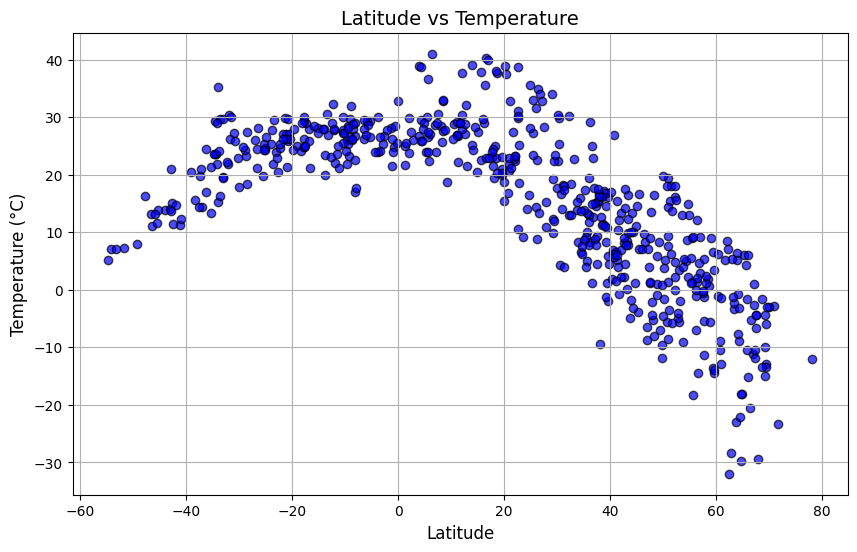

In [57]:
# Create a function for plotting scatter plots
def create_scatter_plot(x, y, x_label, y_label, title):
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.scatter(x, y, color='blue', edgecolor='black', alpha=0.7)  # Scatter plot
    plt.title(title, fontsize=14)  # Title of the plot
    plt.xlabel(x_label, fontsize=12)  # X-axis label
    plt.ylabel(y_label, fontsize=12)  # Y-axis label
    plt.grid(True)  # Show gridlines
    plt.show()  # Display the plot




# Plot latitude vs Temperature
create_scatter_plot(city_data_df['Lat'], city_data_df['Max Temp'], 'Latitude', 'Temperature (°C)', 'Latitude vs Temperature')



#### Latitude Vs. Humidity

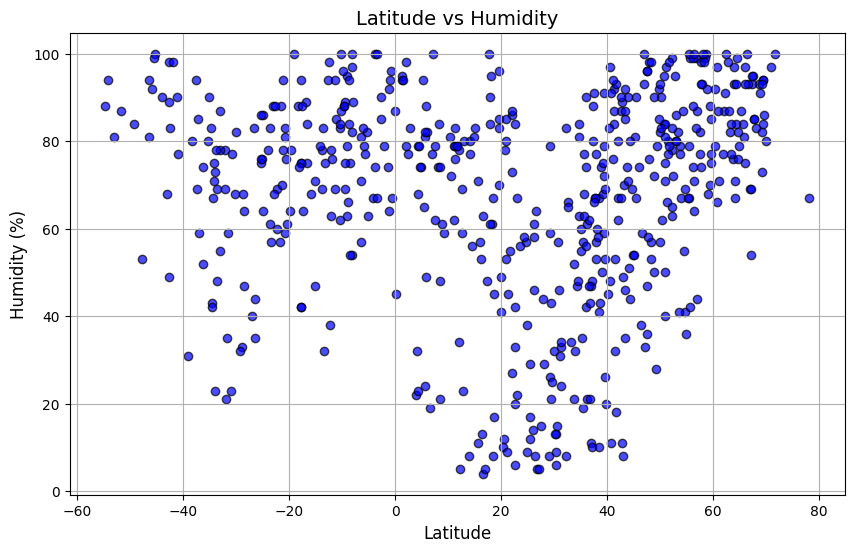

<Figure size 640x480 with 0 Axes>

In [58]:
# Plot latitude vs Humidity
create_scatter_plot(city_data_df['Lat'], city_data_df['Humidity'], 'Latitude', 'Humidity (%)', 'Latitude vs Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

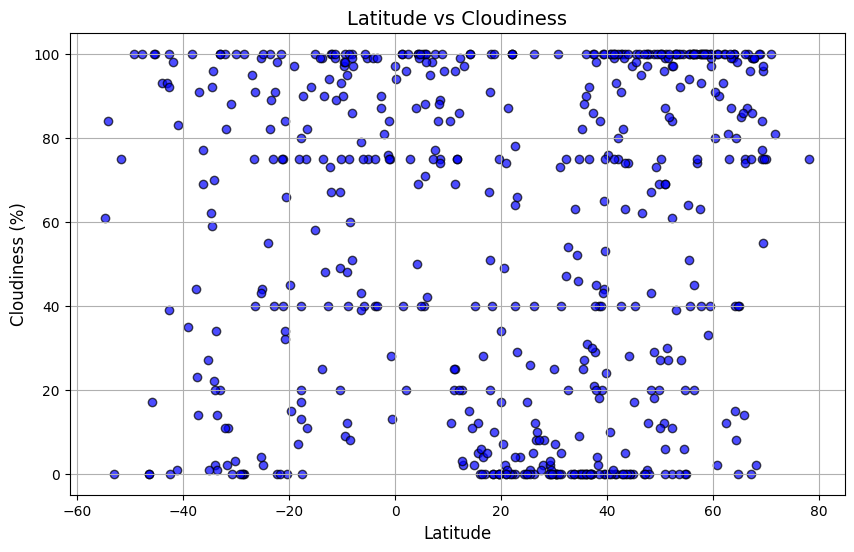

In [59]:
# Plot latitude vs Cloudiness
create_scatter_plot(city_data_df['Lat'], city_data_df['Cloudiness'], 'Latitude', 'Cloudiness (%)', 'Latitude vs Cloudiness')



#### Latitude vs. Wind Speed Plot

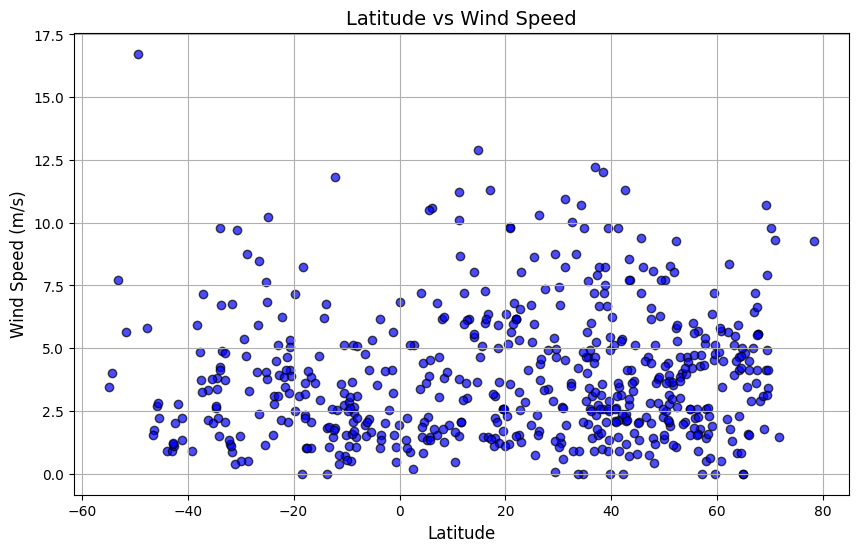

<Figure size 640x480 with 0 Axes>

In [60]:
# Plot latitude vs Wind Speed
create_scatter_plot(city_data_df['Lat'], city_data_df['Wind Speed'], 'Latitude', 'Wind Speed (m/s)', 'Latitude vs Wind Speed')
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [61]:
# Define a function to create Linear Regression plots



# Build scatter plot for latitude vs. temperature
def plot_linear_regression(x, y, hemisphere_name, variable_name):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Plot the scatter plot and regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', label=f'{variable_name} vs Latitude')
    plt.plot(x, slope * x + intercept, color='red', label=f'Linear regression: y = {slope:.2f}x + {intercept:.2f}')
    
    # Add labels and title
    plt.title(f'{hemisphere_name} Hemisphere: {variable_name} vs Latitude')
    plt.xlabel('Latitude')
    plt.ylabel(variable_name)
    plt.legend(loc='upper right')

    # Display R-squared value
    r_squared = r_value**2
    plt.text(0.05, 0.95, f'$R^2$ = {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
    
    # Save the figure
    plt.savefig(f"output_data/{variable_name}_vs_Latitude_{hemisphere_name}.png")

    # Show plot
    plt.show()

    return slope, intercept, r_squared


In [62]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,22.44,86,100,6.17,US,2025-03-20 12:13:15
1,bethel,41.3712,-73.4140,5.18,92,99,0.89,US,2025-03-20 12:13:16
2,bodaybo,57.8506,114.1933,-11.28,93,100,0.50,RU,2025-03-20 12:13:17
4,wickenburg,33.9686,-112.7296,8.33,32,63,0.89,US,2025-03-20 12:13:19
7,longyearbyen,78.2186,15.6401,-12.09,67,75,9.26,SJ,2025-03-20 12:13:23


In [63]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,waitangi,-43.9535,-176.5597,13.79,90,93,0.89,NZ,2025-03-20 12:13:18
5,puerto natales,-51.7236,-72.4875,7.25,87,75,5.66,CL,2025-03-20 12:13:21
6,invercargill,-46.4000,168.3500,11.12,94,0,1.73,NZ,2025-03-20 12:13:22
11,grytviken,-54.2811,-36.5092,7.07,94,84,4.01,GS,2025-03-20 12:13:28
15,papatowai,-46.5619,169.4708,13.15,81,0,1.53,NZ,2025-03-20 12:13:32


###  Temperature vs. Latitude Linear Regression Plot

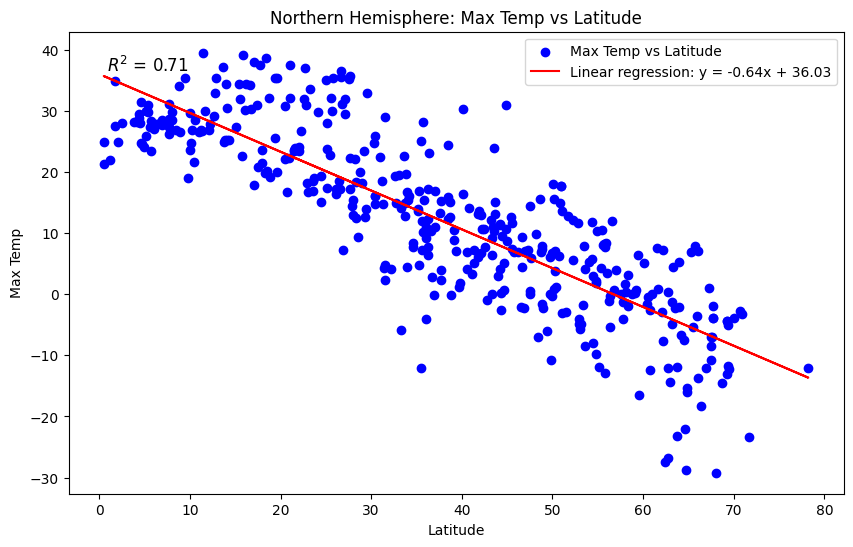

(-0.6352028165726664, 36.02911364190964, 0.7114953890923805)

In [64]:
# Linear regression on Northern Hemisphere

plot_linear_regression(northern_hemisphere['Lat'], northern_hemisphere['Max Temp'], 'Northern', 'Max Temp')


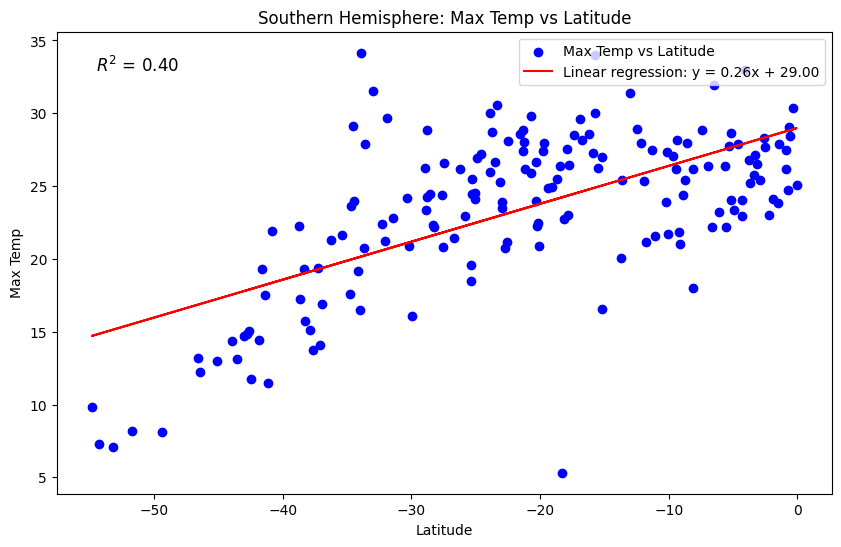

(0.2605081125080594, 28.996000239035535, 0.4045062229656864)

In [65]:
# Southern Hemisphere: Max Temp vs Latitude
plot_linear_regression(southern_hemisphere['Lat'], southern_hemisphere['Max Temp'], 'Southern', 'Max Temp')


**Discussion about the linear relationship:**    Northern Hemisphere slope = -0.6352, intercept = 36.0291, r_squared = 0.711 In the Northern Hemisphere there is a negative correlation between Temperature and Latitude. This correlation indicates that as the latitude increases (moving away from the equator) the temperature decreases. Southern Hemisphere slope = 0.2605 intercept = 28.996, r_squared = 0.40In the Southern Hemisphere there is a positive correlation between temperature and latitude, meaning that as the latitude increases (approaching the equator) the temperature increases.     

### Humidity vs. Latitude Linear Regression Plot

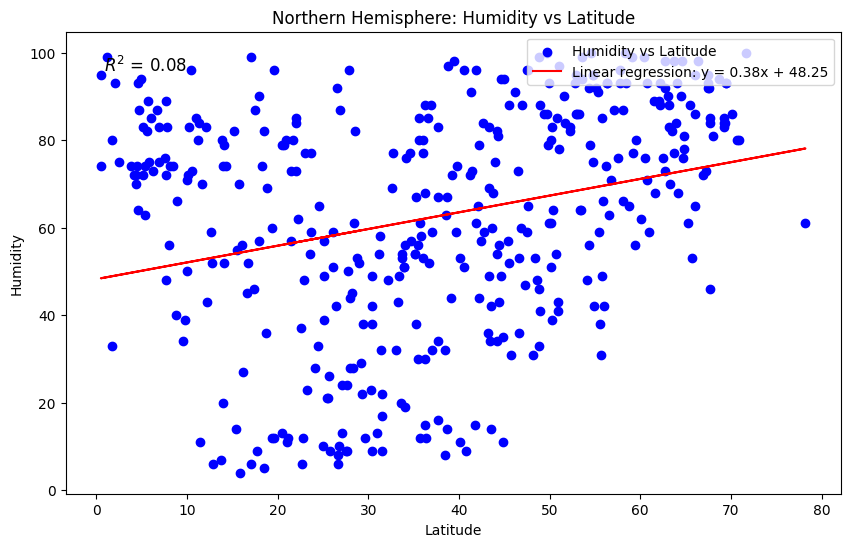

(0.3817696790701826, 48.25236606255196, 0.07653957729174664)

In [66]:
# Northern Hemisphere
plot_linear_regression(northern_hemisphere['Lat'], northern_hemisphere['Humidity'], 'Northern', 'Humidity')


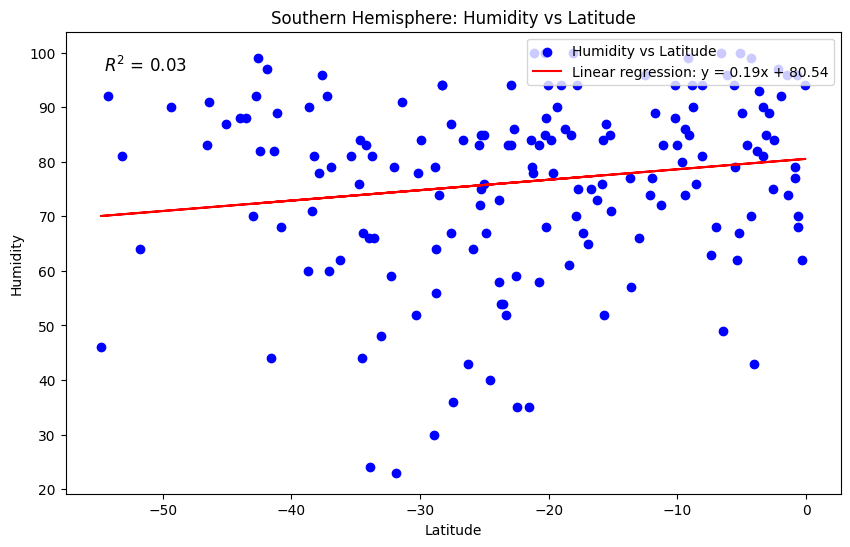

(0.19128043707965176, 80.54394529550397, 0.0251365031457471)

In [67]:
# Southern Hemisphere: Humidity vs Latitude
plot_linear_regression(southern_hemisphere['Lat'], southern_hemisphere['Humidity'], 'Southern', 'Humidity')



**Discussion about the linear relationship:** Northern Hemisphere R-squared value of 0.08 means only about 8% of the variation in humidity is correlated with latitude. the slope of the regression line for the northern hemisphere is a bit more of a positive slope, but the gradual slope with the low r-squared value indicate that latitude is not predictive of humidity. Southern Hemisphere R-squared value of 0.0251 means that only about 2.5% of the variation in Humidity can be explained by latitude. the slight upward slope of the regression line shows again that there is little relationship. 

### Cloudiness vs. Latitude Linear Regression Plot

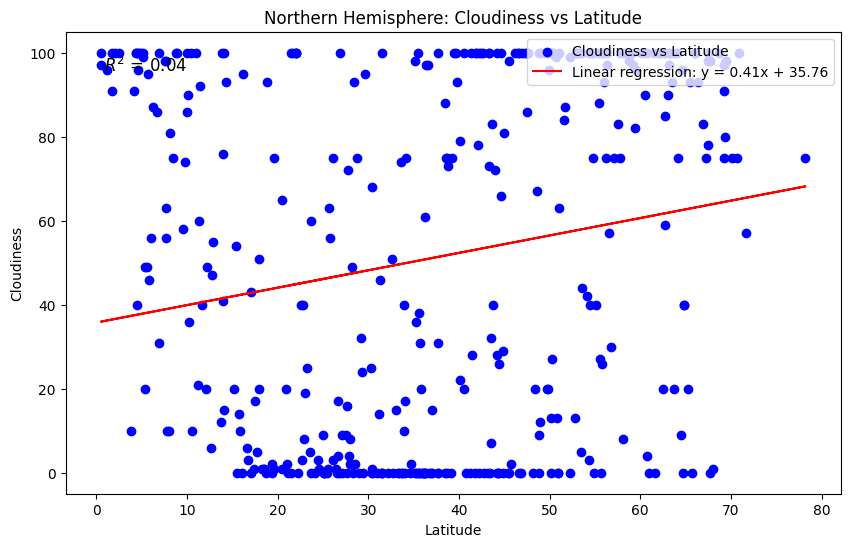

(0.4145565229402598, 35.761951891005914, 0.03541303246150623)

In [68]:
# Northern Hemisphere: Cloudiness vs Latitude
plot_linear_regression(northern_hemisphere['Lat'], northern_hemisphere['Cloudiness'], 'Northern', 'Cloudiness')


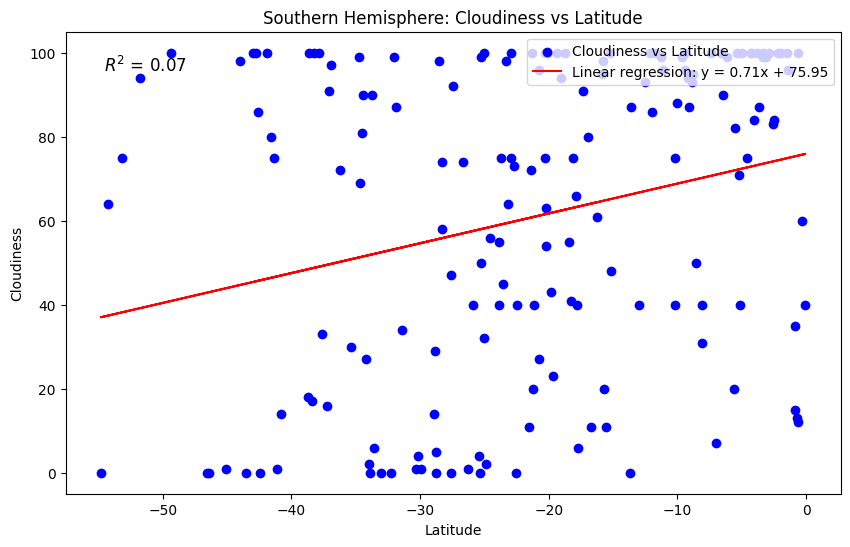

(0.7104226428490311, 75.9496157940112, 0.06881188649355448)

In [69]:
# Southern Hemisphere: Cloudiness vs Latitude
plot_linear_regression(southern_hemisphere['Lat'], southern_hemisphere['Cloudiness'], 'Southern', 'Cloudiness')


**Discussion about the linear relationship:**  Northern Hemisphere The r^2-value is: 0.006456908379763574 which is very low, indicating that latitude has very little correlation to the cloudiness of a location. Southern Hemisphere r^2-value is: 0.018616831531634456 which is also quite low, indicating again that the latitude in the southern Hemisphere also has little to no predictive power as far as cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

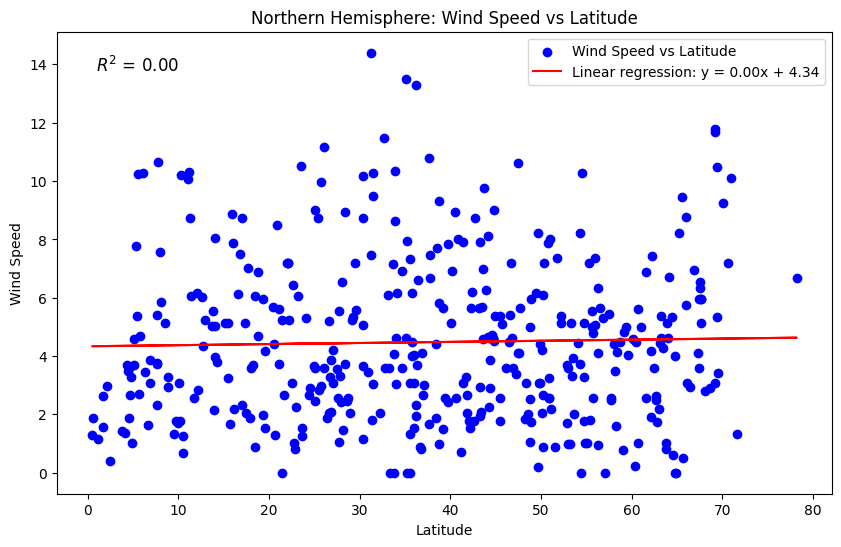

(0.003762724198727144, 4.335347455109822, 0.0006739613240671978)

In [70]:
# Northern Hemisphere: Wind Speed vs Latitude
plot_linear_regression(northern_hemisphere['Lat'], northern_hemisphere['Wind Speed'], 'Northern', 'Wind Speed')


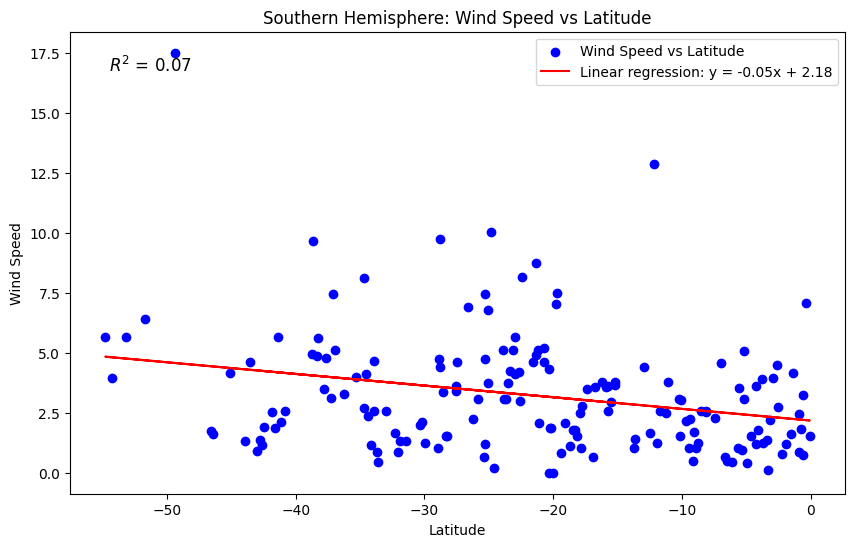

(-0.04859382146699839, 2.1770456623677594, 0.07279961809864474)

In [71]:
# Southern Hemisphere: Wind Speed vs Latitude
plot_linear_regression(southern_hemisphere['Lat'], southern_hemisphere['Wind Speed'], 'Southern', 'Wind Speed')


**Discussion about the linear relationship:** The r^2-value is: 0.0017 in the northern hemisphere and 0.065 in the southern hemisphere. Both r-squared values are low indicating that wind speed does not correlate with latitude. Th,e northern Hemisphere regression line is nearly horizontal, also indicating little to no correlation. the southern hemisphere regression line has a slight downward slope to the left, but again, there is little change indicating a lack of meaningful correlation.